In [2]:

from google.colab import drive
drive.mount('/content/data/')

Drive already mounted at /content/data/; to attempt to forcibly remount, call drive.mount("/content/data/", force_remount=True).


In [44]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 데이터 로드 함수
bank_data = pd.read_csv('/content/data/MyDrive/BootCamp_SKN10/Mini_Project/2nd_4Team/Customer-Churn-Records.csv')
telco_data = pd.read_csv('/content/data/MyDrive/BootCamp_SKN10/Mini_Project/2nd_4Team/WA_Fn-UseC_-Telco-Customer-Churn.csv')



# Telco

In [4]:
telco_data.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [5]:
bank_data.columns.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Card Type',
 'Point Earned']

In [45]:
telco_data.columns = telco_data.columns.str.strip()  # 컬럼명 앞뒤 공백 제거
print("Telco 데이터셋 컬럼명:")
print(telco_data.columns.tolist())
print("Dataset shape:", telco_data.shape)

Telco 데이터셋 컬럼명:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Dataset shape: (7043, 21)


In [46]:
# 2. 식별자 컬럼 제거 (예: customerID)
identifier_cols = ['customerID']
telco_data = telco_data.drop(columns=identifier_cols, errors='ignore')


In [47]:
# 3. 타겟 변수 인코딩: 'Churn' 컬럼이 'Yes'이면 1, 'No'이면 0으로 변환
if 'Churn' in telco_data.columns:
    telco_data['Churn'] = telco_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
else:
    raise ValueError("타겟 컬럼 'Churn'이 존재하지 않습니다.")


In [48]:
# 4. 범주형 변수 원-핫 인코딩 처리
telco_processed = pd.get_dummies(telco_data)

# 5. 데이터 분할: 80:20 비율, 시드 고정, 셔플 적용
X = telco_processed.drop('Churn', axis=1)
y = telco_processed['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 6. RandomForest 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

===== Telco 데이터셋 피쳐 임포턴스 상위 10개 =====
tenure                            0.100154
MonthlyCharges                    0.083317
Contract_Month-to-month           0.038140
PaymentMethod_Electronic check    0.022077
OnlineSecurity_No                 0.020459
TechSupport_No                    0.020174
Contract_Two year                 0.017560
OnlineSecurity_Yes                0.016115
OnlineBackup_No                   0.015353
SeniorCitizen                     0.015160
dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53556 (\N{HANGUL SYLLABLE TEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

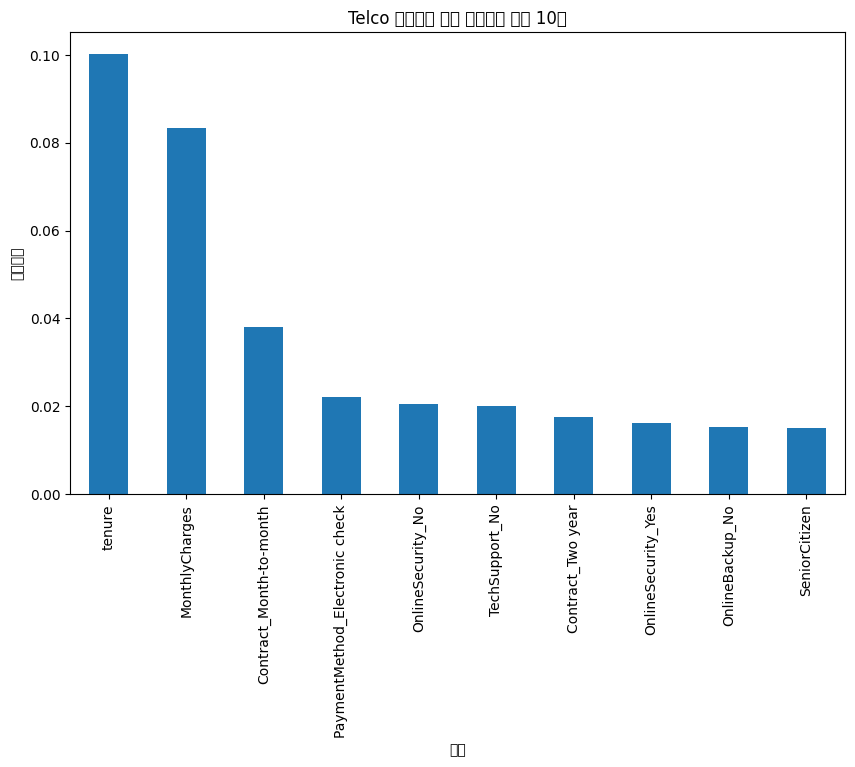

In [49]:

# 7. 피쳐 임포턴스 평가 및 시각화
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("===== Telco 데이터셋 피쳐 임포턴스 상위 10개 =====")
print(feat_importances.head(10))
plt.figure(figsize=(10,6))
feat_importances.head(10).plot(kind='bar')
plt.title('Telco 데이터셋 피쳐 임포턴스 상위 10개')
plt.xlabel('피쳐')
plt.ylabel('임포턴스')
plt.show()

===== 혼동행렬 (Confusion Matrix) =====
[[942  94]
 [203 170]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49483 (\N{HANGUL SYLLABLE SES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

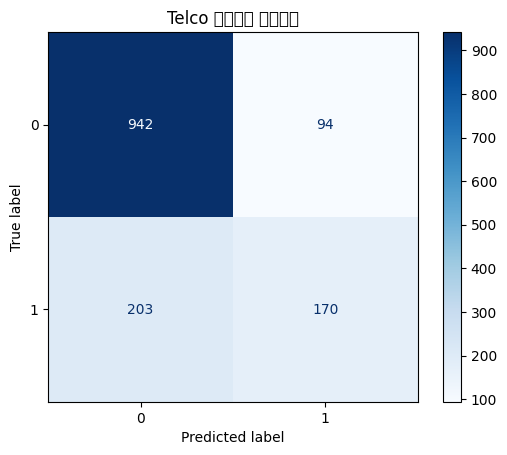

In [50]:

# 8. 모델 평가: 예측 및 혼동행렬 생성
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("===== 혼동행렬 (Confusion Matrix) =====")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Telco 데이터셋 혼동행렬")
plt.show()

In [51]:

# 9. 분류 보고서 출력 (Precision, Recall, F1 등)
print("===== Classification Report =====")
print(classification_report(y_test, y_pred))


===== Classification Report =====
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:

# 10. 상관관계 히트맵 시각화
plt.figure(figsize=(12,10))
corr = telco_processed.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Telco 데이터셋 상관관계 히트맵")
plt.show()

# Back

In [15]:

# 2. 타겟 변수 인코딩: 'Exited' 컬럼이 'Yes'이면 1, 아니면 0으로 변환
if 'Exited' in bank_data.columns:
    bank_data['Exited'] = bank_data['Exited'].apply(lambda x: 1 if x == 'Yes' else 0)
else:
    raise ValueError("타겟 컬럼 'Exited'가 존재하지 않습니다.")


In [21]:
bank_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,0,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,0,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0,1,2,GOLD,339


In [32]:
bank_data.columns = bank_data.columns.str.strip()  # 컬럼명 앞뒤 공백 제거

In [33]:

print("Bank 데이터셋 컬럼명:")
print(bank_data.columns.tolist())

Bank 데이터셋 컬럼명:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned']


In [34]:
# 2. 식별자 컬럼 제거 (모델 학습에 불필요한 정보)
identifier_cols = ['RowNumber', 'CustomerId', 'Surname']
bank_data = bank_data.drop(columns=identifier_cols, errors='ignore')

In [35]:

# 3. 타겟 변수 인코딩: 'Exited' 컬럼이 'Yes'이면 1, 아니면 0으로 변환
if 'Exited' in bank_data.columns:
    # 만약 'Exited' 컬럼이 문자열이라면 변환 (이미 숫자면 그대로 사용)
    if bank_data['Exited'].dtype == 'object':
        bank_data['Exited'] = bank_data['Exited'].apply(lambda x: 1 if x == 'Yes' else 0)
else:
    raise ValueError("타겟 컬럼 'Exited'가 존재하지 않습니다.")


In [36]:
# 4. 범주형 변수 원-핫 인코딩 처리
bank_processed = pd.get_dummies(bank_data)


In [37]:

# 5. 데이터 분할: 80:20 비율, 시드 고정, 셔플 적용
X = bank_processed.drop('Exited', axis=1)
y = bank_processed['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 6. RandomForest 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:

# 7. 피쳐 임포턴스 평가 및 시각화
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("===== Bank 데이터셋 피쳐 임포턴스 상위 10개 =====")
print(feat_importances.head(10))

===== Bank 데이터셋 피쳐 임포턴스 상위 10개 =====
Complain             0.782719
Age                  0.066233
NumOfProducts        0.052477
Balance              0.016950
IsActiveMember       0.015008
CreditScore          0.011182
Point Earned         0.010351
EstimatedSalary      0.010004
Geography_Germany    0.008824
Tenure               0.006233
dtype: float64


In [43]:
# 6. 피쳐 임포턴스 계산 및 시각화
bank_importance = get_feature_importance(bank_processed, target_col)
print("===== Bank 데이터셋 피쳐 임포턴스 상위 10개 =====")
print(bank_importance.head(10))

===== Bank 데이터셋 피쳐 임포턴스 상위 10개 =====
Complain             0.788429
Age                  0.069464
NumOfProducts        0.046453
Balance              0.015650
IsActiveMember       0.013713
EstimatedSalary      0.011049
CreditScore          0.010938
Point Earned         0.010723
Geography_Germany    0.008876
Tenure               0.005725
dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53556 (\N{HANGUL SYLLABLE TEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

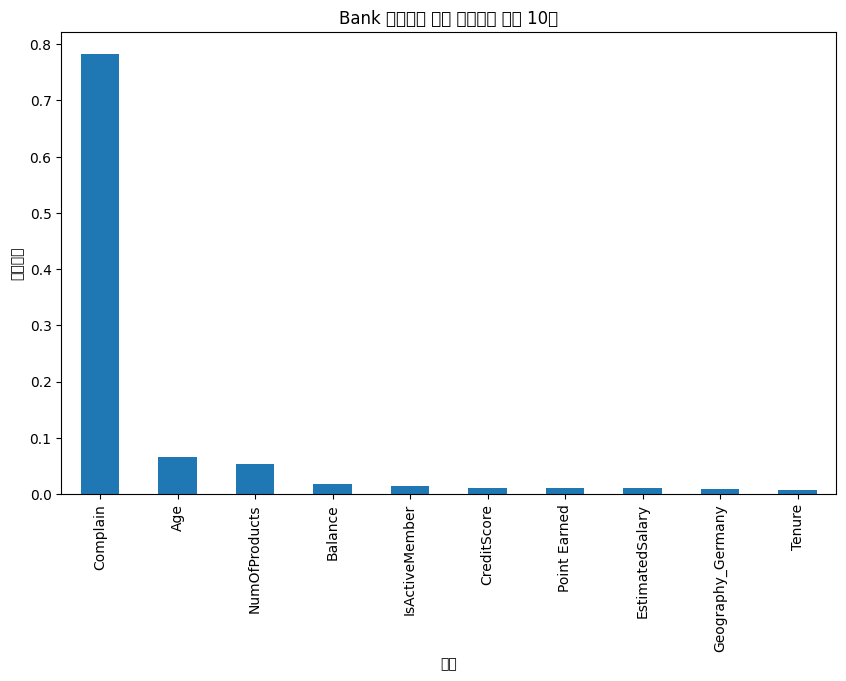

In [39]:

plt.figure(figsize=(10,6))
feat_importances.head(10).plot(kind='bar')
plt.title('Bank 데이터셋 피쳐 임포턴스 상위 10개')
plt.xlabel('피쳐')
plt.ylabel('임포턴스')
plt.show()


===== 혼동행렬 (Confusion Matrix) =====
[[1606    1]
 [   1  392]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49483 (\N{HANGUL SYLLABLE SES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

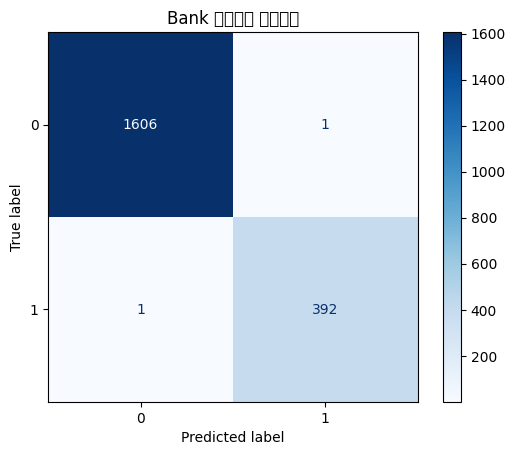

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 8. 모델 평가: 예측 및 혼동행렬 생성
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("===== 혼동행렬 (Confusion Matrix) =====")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Bank 데이터셋 혼동행렬")
plt.show()


1. Telco Customer Churn
출처: Kaggle Dataset
설명: 통신사 고객의 이탈 여부를 예측하기 위한 데이터셋으로, 고객의 인구통계학적 정보, 서비스 이용 현황, 청구 정보 등을 포함하고 있습니다.
주요 피처:
gender: 성별
SeniorCitizen: 고령자 여부
Partner: 배우자 유무
Dependents: 부양가족 유무
tenure: 가입 기간(개월)
PhoneService: 전화 서비스 가입 여부
MultipleLines: 다중 회선 여부
InternetService: 인터넷 서비스 유형
OnlineSecurity: 온라인 보안 서비스 가입 여부
OnlineBackup: 온라인 백업 서비스 가입 여부
DeviceProtection: 기기 보호 서비스 가입 여부
TechSupport: 기술 지원 서비스 가입 여부
StreamingTV: TV 스트리밍 서비스 가입 여부
StreamingMovies: 영화 스트리밍 서비스 가입 여부
Contract: 계약 유형 (월별, 1년, 2년)
PaperlessBilling: 전자 청구서 여부
PaymentMethod: 지불 방법
MonthlyCharges: 월별 청구 금액
TotalCharges: 총 청구 금액
Churn: 이탈 여부 (타겟 변수)

2. Bank Customer Churn
출처: Kaggle Dataset
설명: 은행 고객의 이탈 여부를 예측하기 위한 데이터셋으로, 고객의 신상 정보, 계좌 정보, 활동 내역 등을 포함하고 있습니다.
주요 피처:
RowNumber: 행 번호
CustomerId: 고객 ID
Surname: 성
CreditScore: 신용 점수
Geography: 지리적 위치 (국가)
Gender: 성별
Age: 나이
Tenure: 계좌 보유 기간(년)
Balance: 계좌 잔액
NumOfProducts: 보유 상품 개수
HasCrCard: 신용카드 보유 여부
IsActiveMember: 활성 고객 여부
EstimatedSalary: 예상 연봉
Exited: 이탈 여부 (타겟 변수)